In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install super-gradients ultralytics==8.0.186 supervision sahi roboflow==1.1.16 opencv-python wandb -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="QKnIGsOx41j1fVIu70oi")
project = rf.workspace("trainmodel").project("gender-detection-qiyyg")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.186, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Gender-Detection-2 in yolov8:: 100%|██████████| 4616/4616 [00:00<00:00, 9194.80it/s]


In [4]:
import yaml

def extract_names_from_yaml(file_path):
    with open(file_path, 'r') as file:
        try:
            yaml_content = yaml.safe_load(file)
            if 'names' in yaml_content:
                return yaml_content['names']
            else:
                return []
        except yaml.YAMLError as error:
            print(error)
            return []

In [6]:
NAMES = extract_names_from_yaml("/content/Gender-Detection-2/data.yaml")

In [7]:
NAMES

['Female', 'Male']

## Train the YOLOv8 Model

In [8]:
IMGSZ = 960
BATCH = 8
EPOCHS = 5

In [10]:
!pip install wandb --quiet

In [11]:
import wandb

config = {
    "project": "gender-detect-yolov8",
    "num_of_classes": len(NAMES),
    "classes": NAMES,
    "imgsz": IMGSZ,
    "batch": BATCH
}
wandb.init(project = config["project"], config = config)

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [14]:
from wandb.integration.ultralytics import add_wandb_callback
from ultralytics import YOLO

from IPython.display import display, Image

%cd {HOME}
model_name = "yolov8n"


model = YOLO(f"{model_name}.pt")
add_wandb_callback(model, enable_model_checkpointing=True)
results = model.train(
    project="gender-detect-yolov8",
    data = '/content/Gender-Detection-2/data.yaml',
    epochs = EPOCHS,
    device = 0,
    save_period = 10,
    imgsz = IMGSZ,
    batch = BATCH
)

model.val()

/content


New https://pypi.org/project/ultralytics/8.1.0 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Gender-Detection-2/data.yaml, epochs=5, patience=50, batch=8, imgsz=960, save=True, save_period=10, cache=False, device=0, workers=8, project=gender-detect-yolov8, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=Fals

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e4e24f30df0>
fitness: 0.8759063543628602
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.85847,     0.87943])
names: {0: 'Female', 1: 'Male'}
plot: True
results_dict: {'metrics/precision(B)': 0.807623349818285, 'metrics/recall(B)': 0.8820680447370642, 'metrics/mAP50(B)': 0.9385205154357534, 'metrics/mAP50-95(B)': 0.8689492253547609, 'fitness': 0.8759063543628602}
save_dir: PosixPath('gender-detect-yolov8/val')
speed: {'preprocess': 1.0850134103194529, 'inference': 14.382895179416822, 'loss': 0.0031761501146399455, 'postprocess': 4.142514519069506}

/content


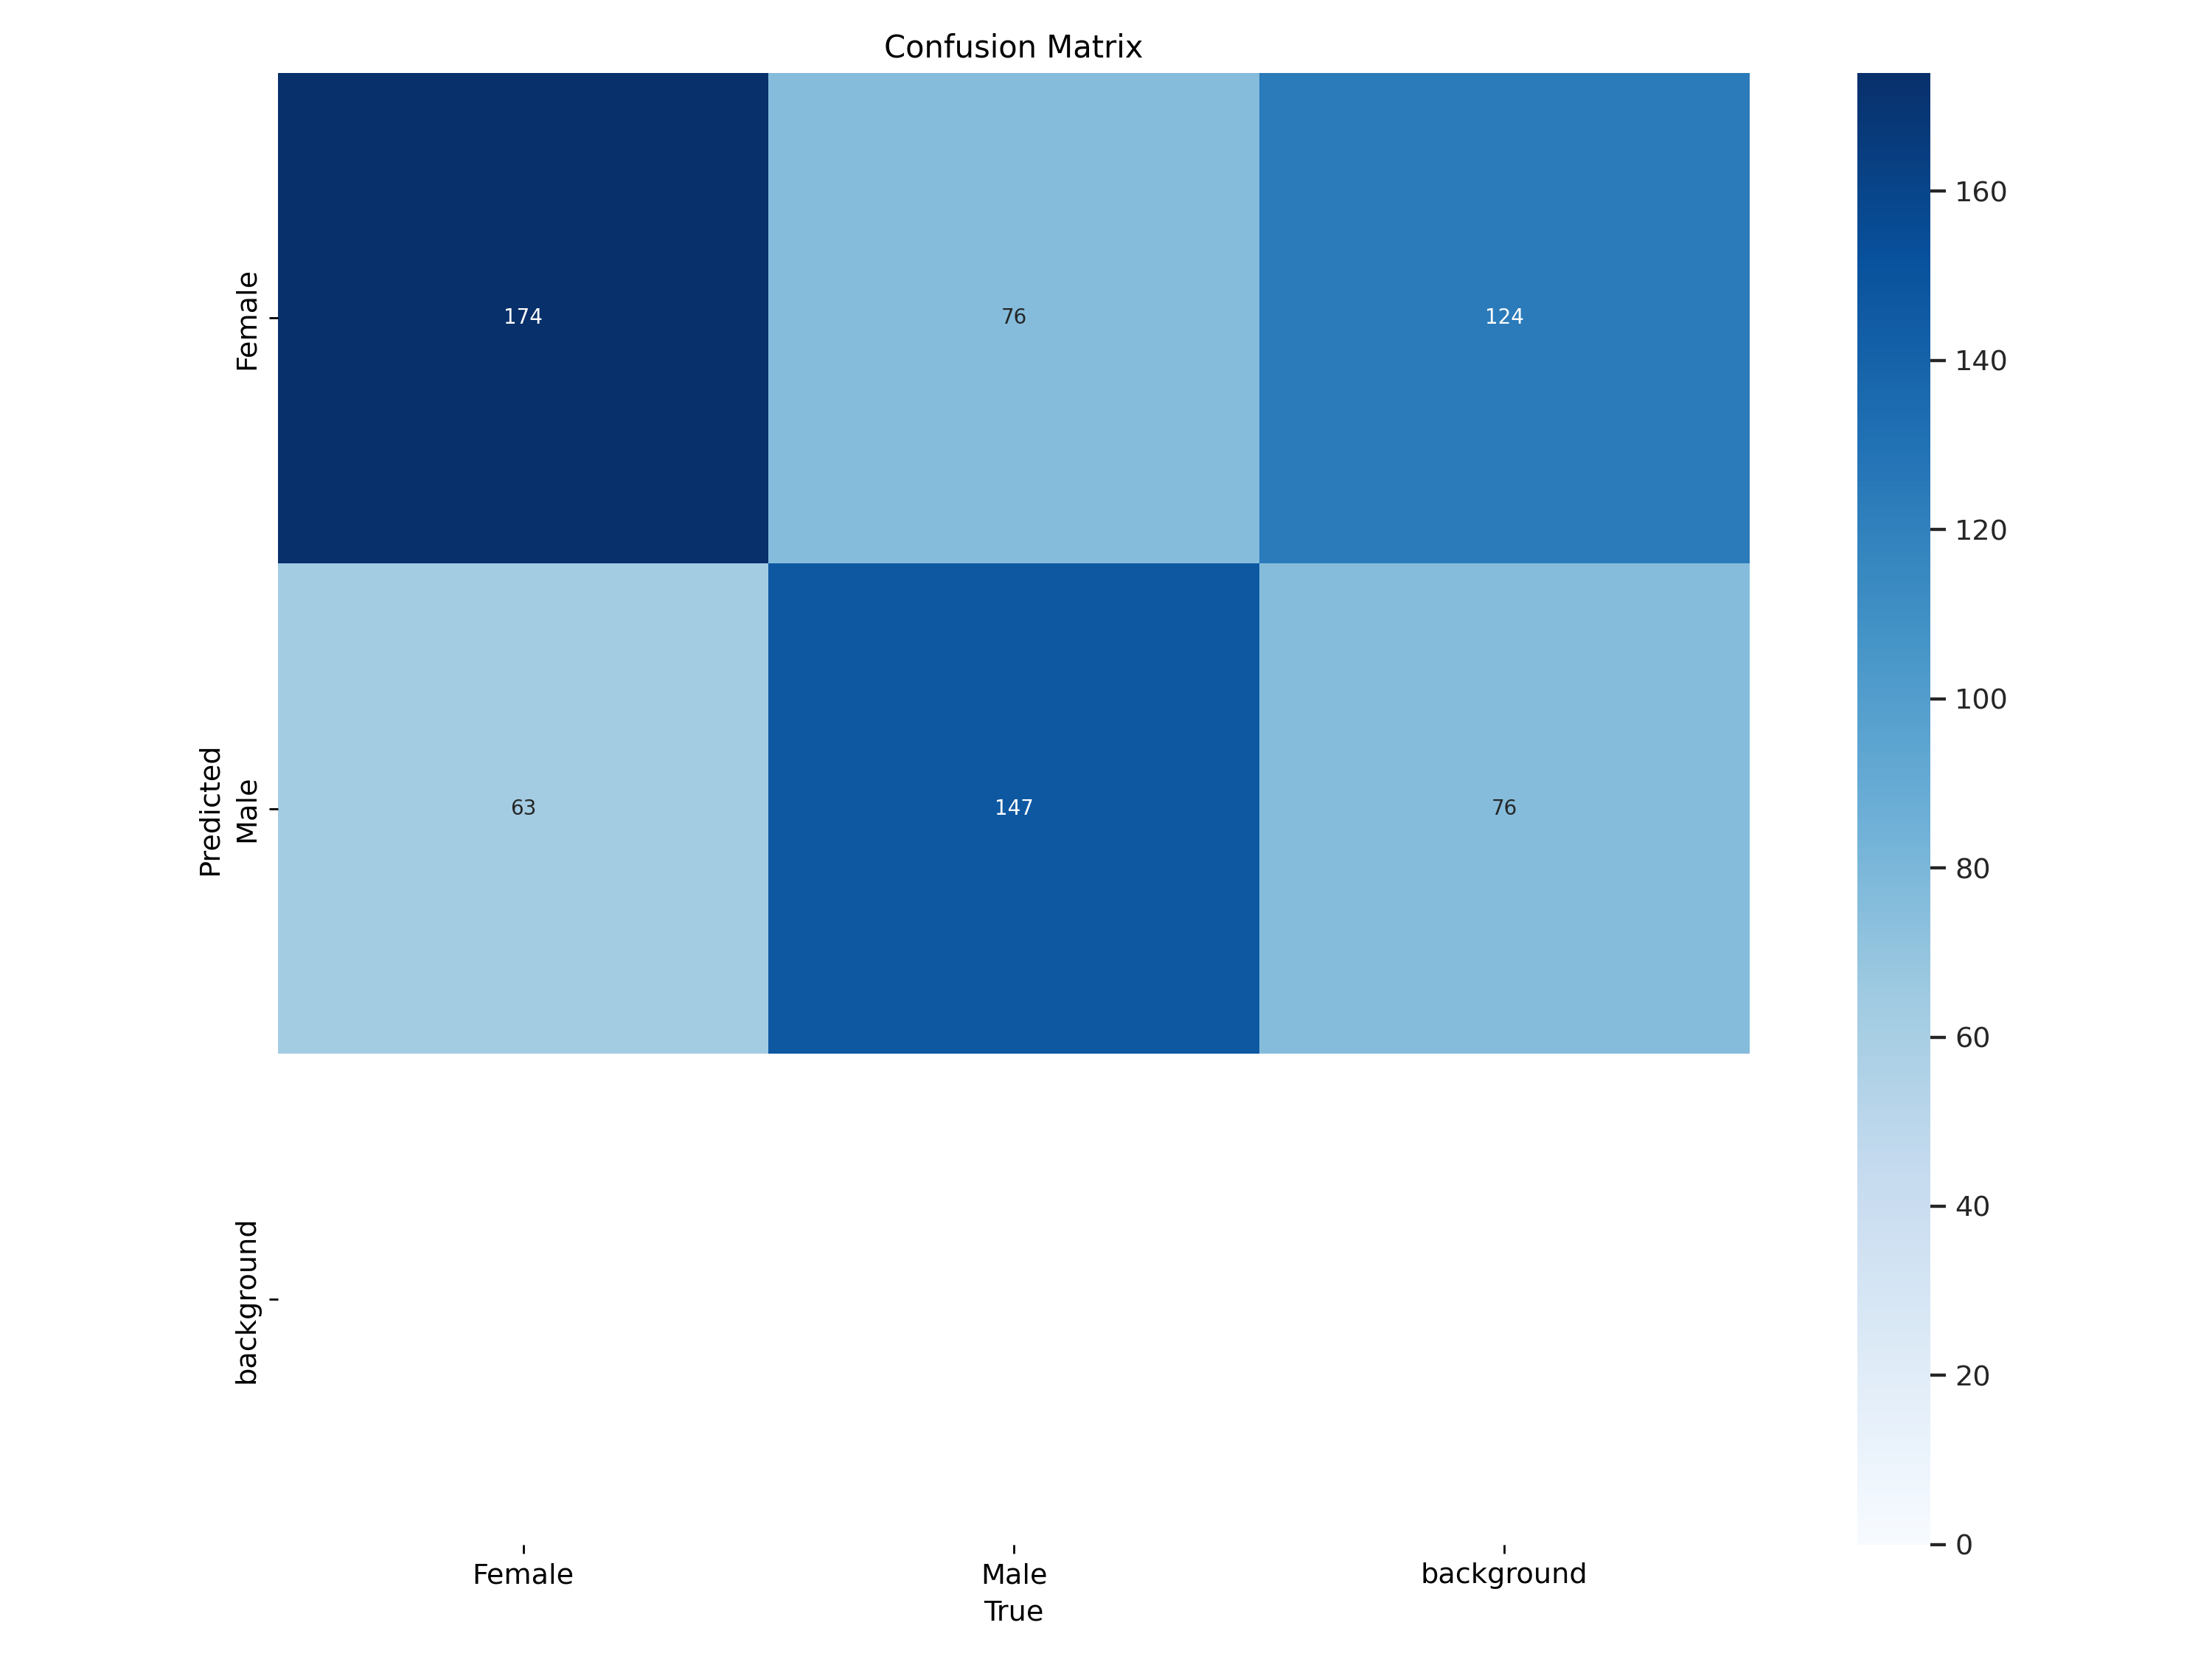

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/gender-detect-yolov8/train3/confusion_matrix.png', width=600)

/content


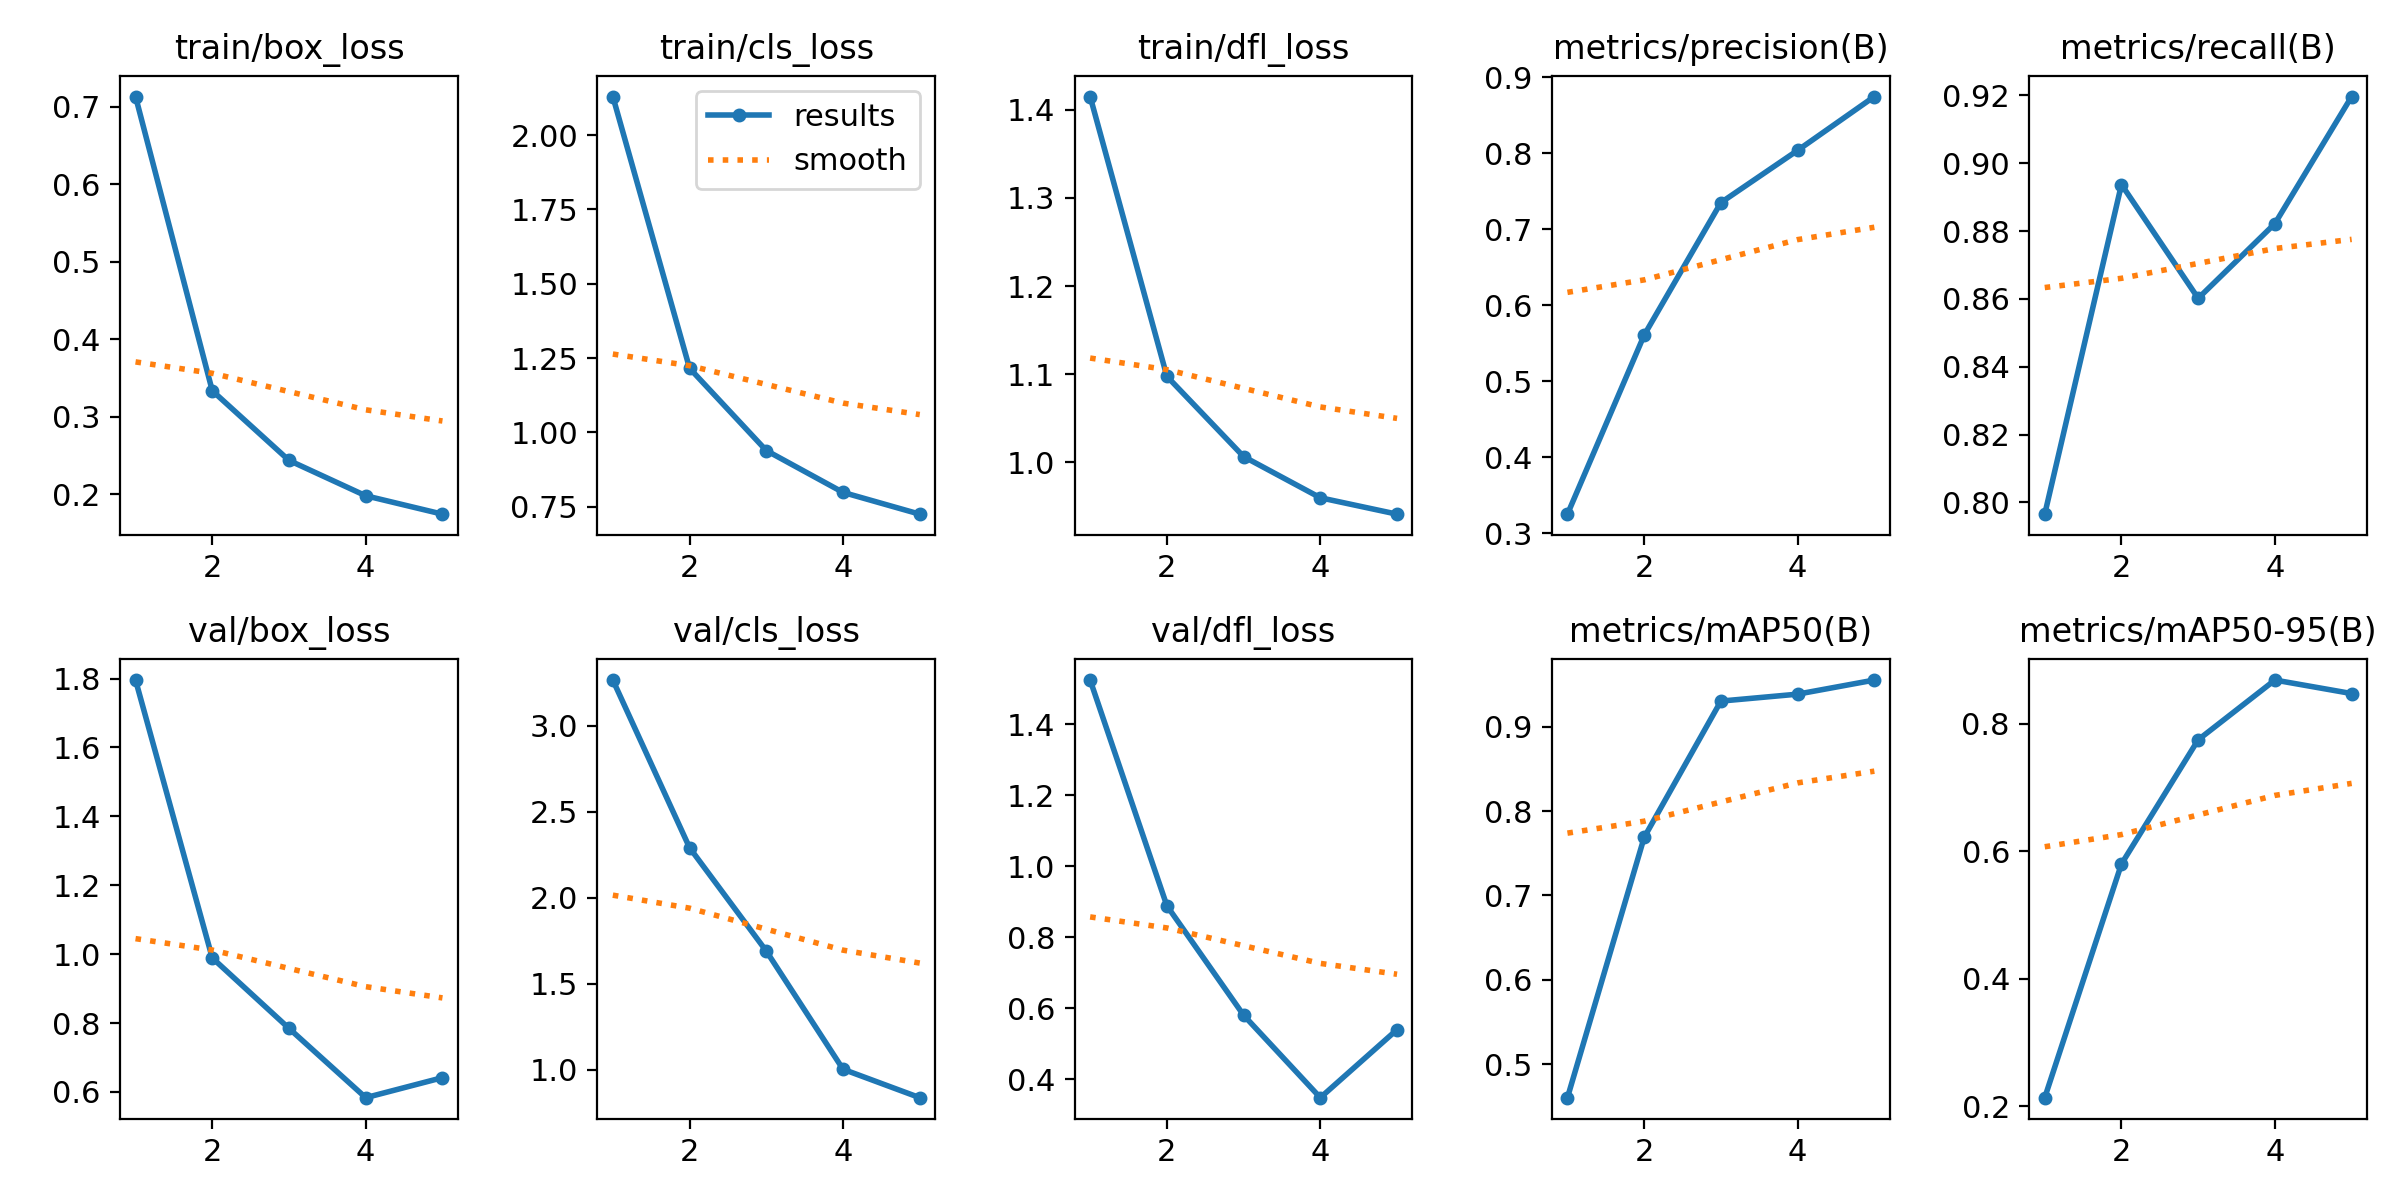

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/gender-detect-yolov8/train3/results.png', width=600)

/content


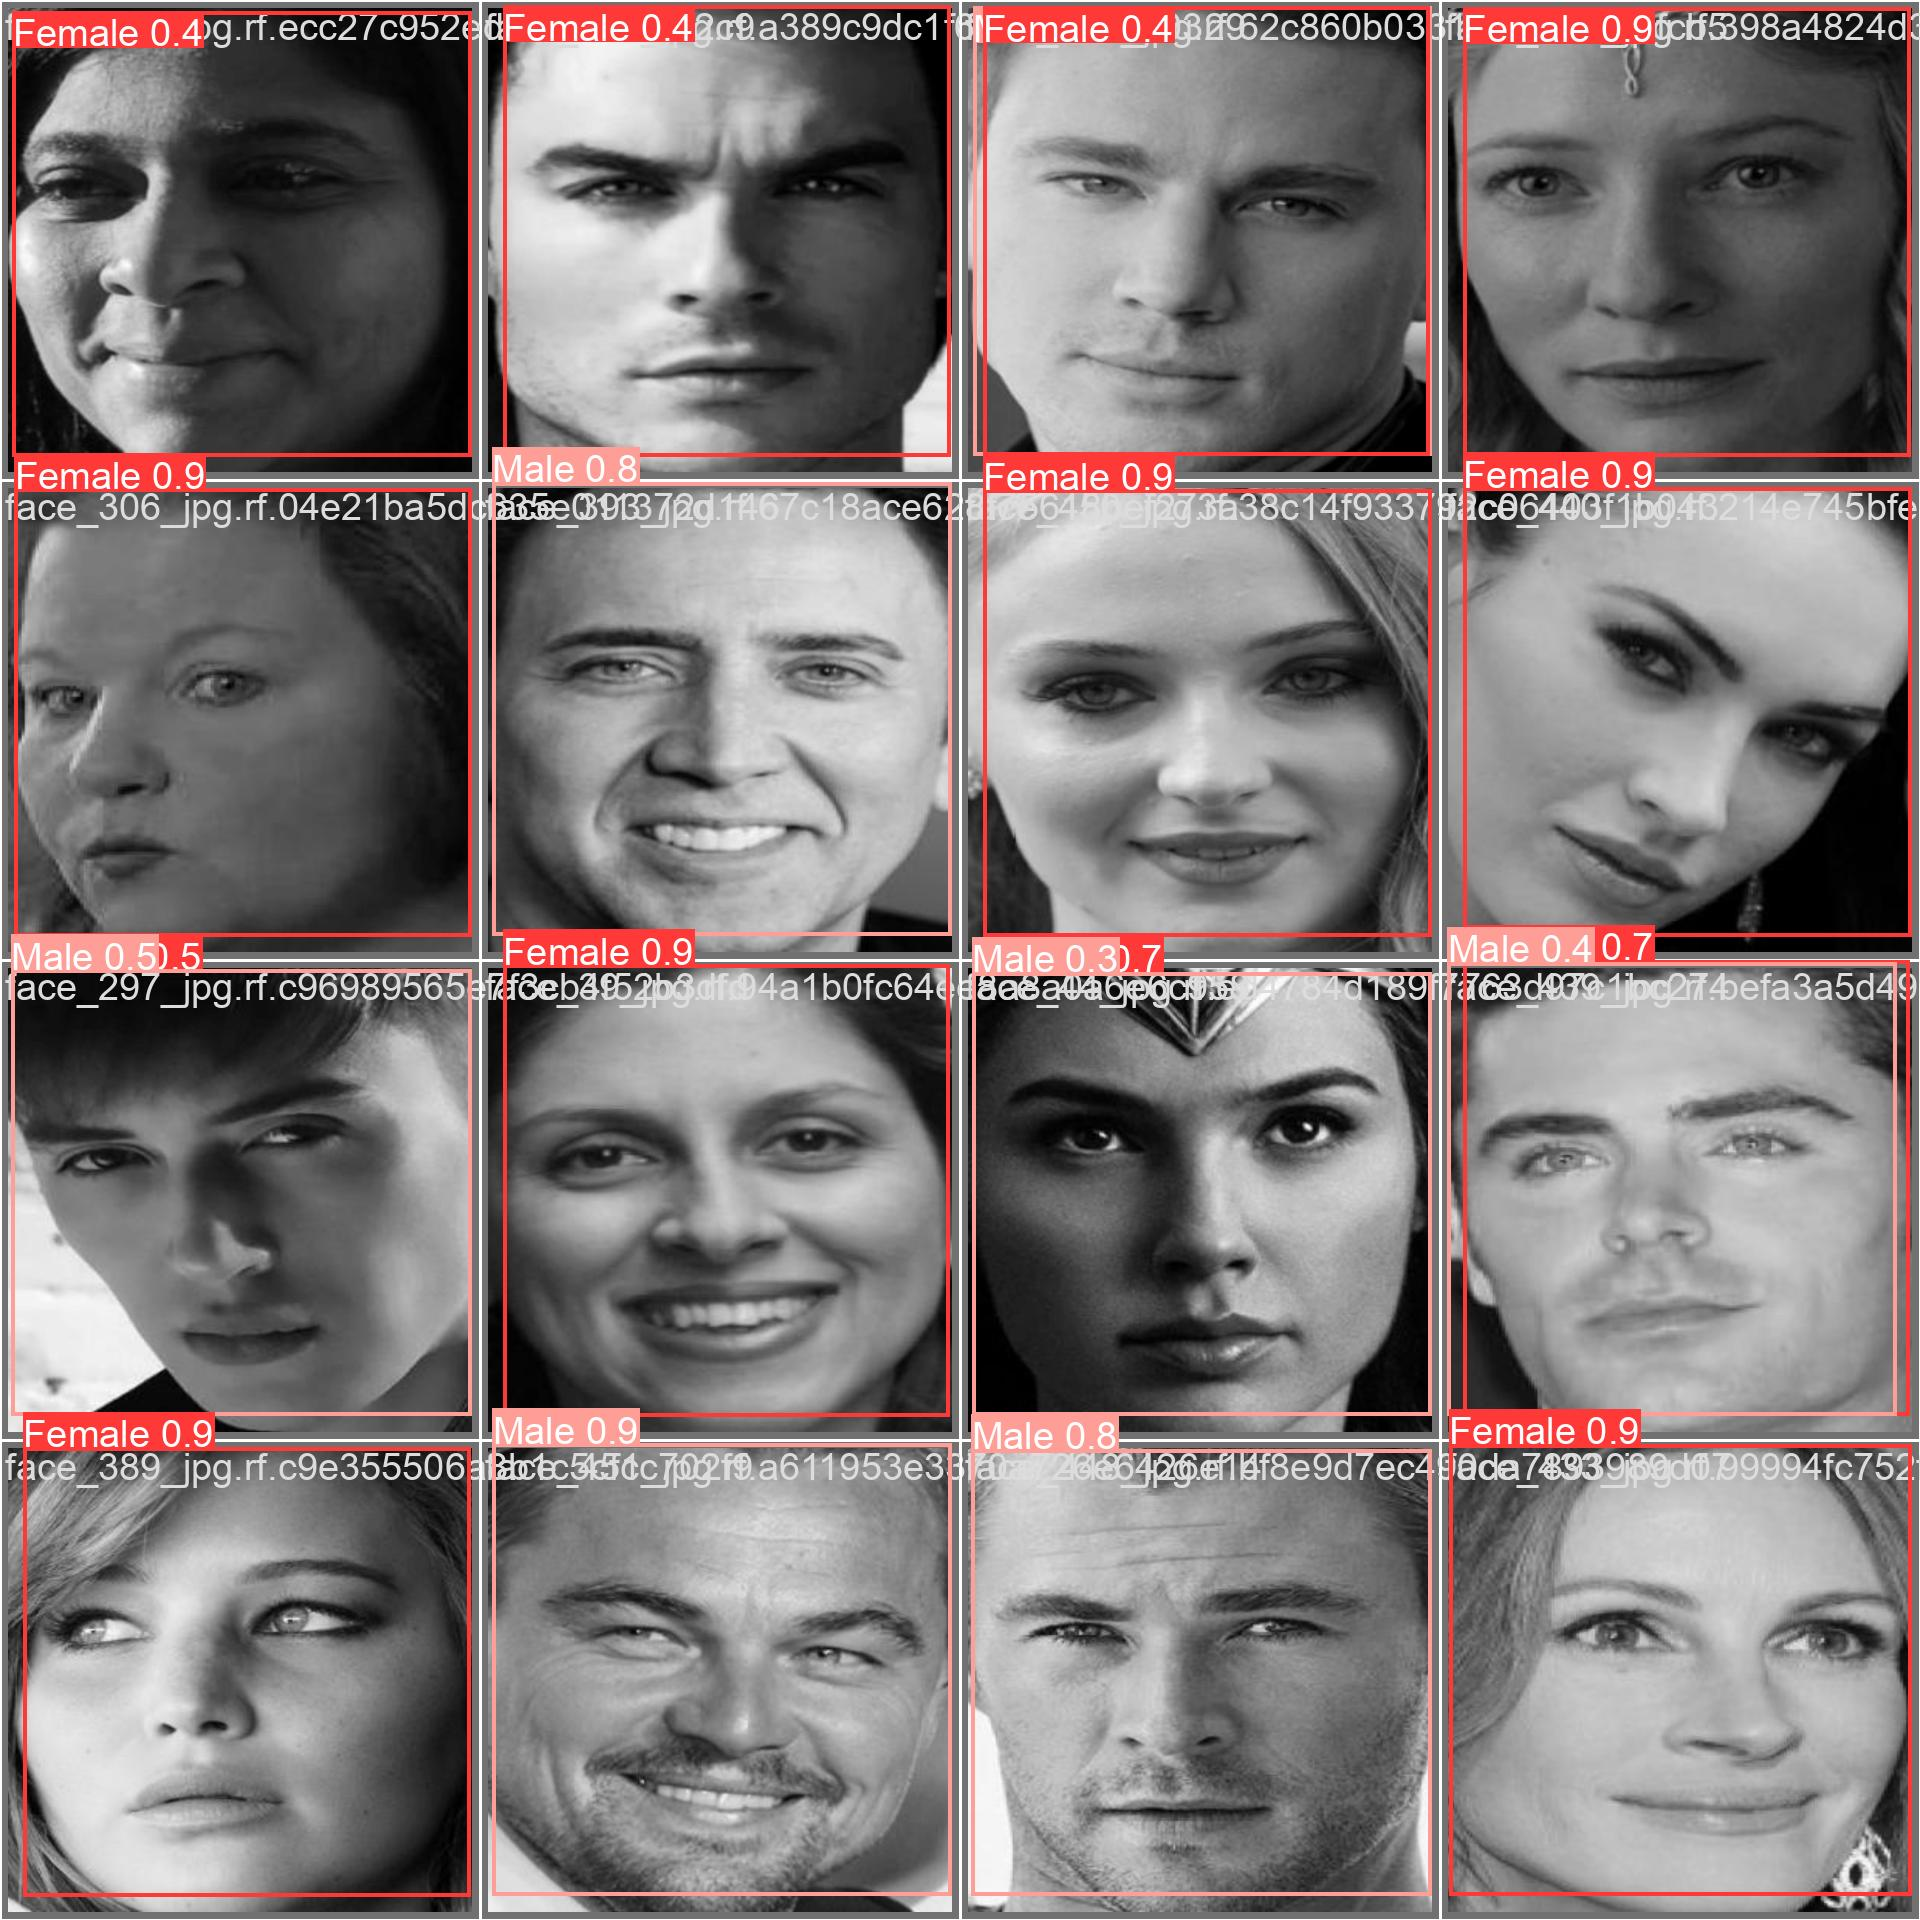

In [22]:
%cd {HOME}
Image(filename=f'{HOME}/gender-detect-yolov8/train3/val_batch0_pred.jpg', width=600)